## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\amita\Desktop\ML Projects\My Projects\Churn Rate\Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

3

In [8]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [10]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
dataset.isnull().values.sum()

0

In [12]:
dataset.isnull().values.any()

False

In [13]:
#Encode Categorical data

In [14]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [15]:
dataset = dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [16]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
dataset.groupby('Geography').mean()

C:\Users\amita\AppData\Local\Temp\ipykernel_22712\3460784336.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Geography').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [21]:
dataset.groupby('Gender').mean()

C:\Users\amita\AppData\Local\Temp\ipykernel_22712\1649157668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Gender').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [22]:
#One hot encoding on categorical
dataset = pd.get_dummies(data = dataset, drop_first=True)

In [23]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


0    7963
1    2037
Name: Exited, dtype: int64


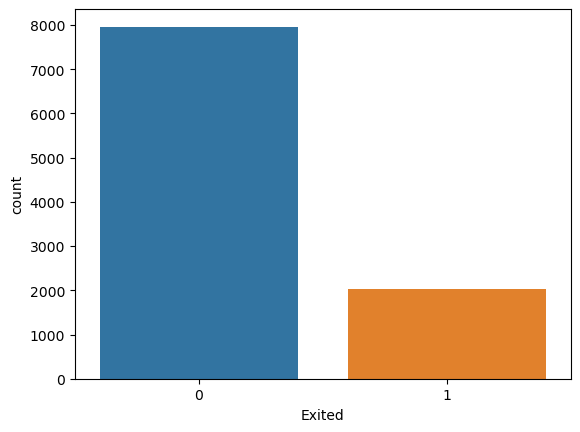

In [24]:
print(dataset['Exited'].value_counts())

# Creating the count plot
sns.countplot(x='Exited', data=dataset)
plt.show()

In [25]:
#Correlation matrix and heat map
dataset_2 = dataset.drop(columns='Exited')

<Axes: title={'center': 'Corr with Exited'}>

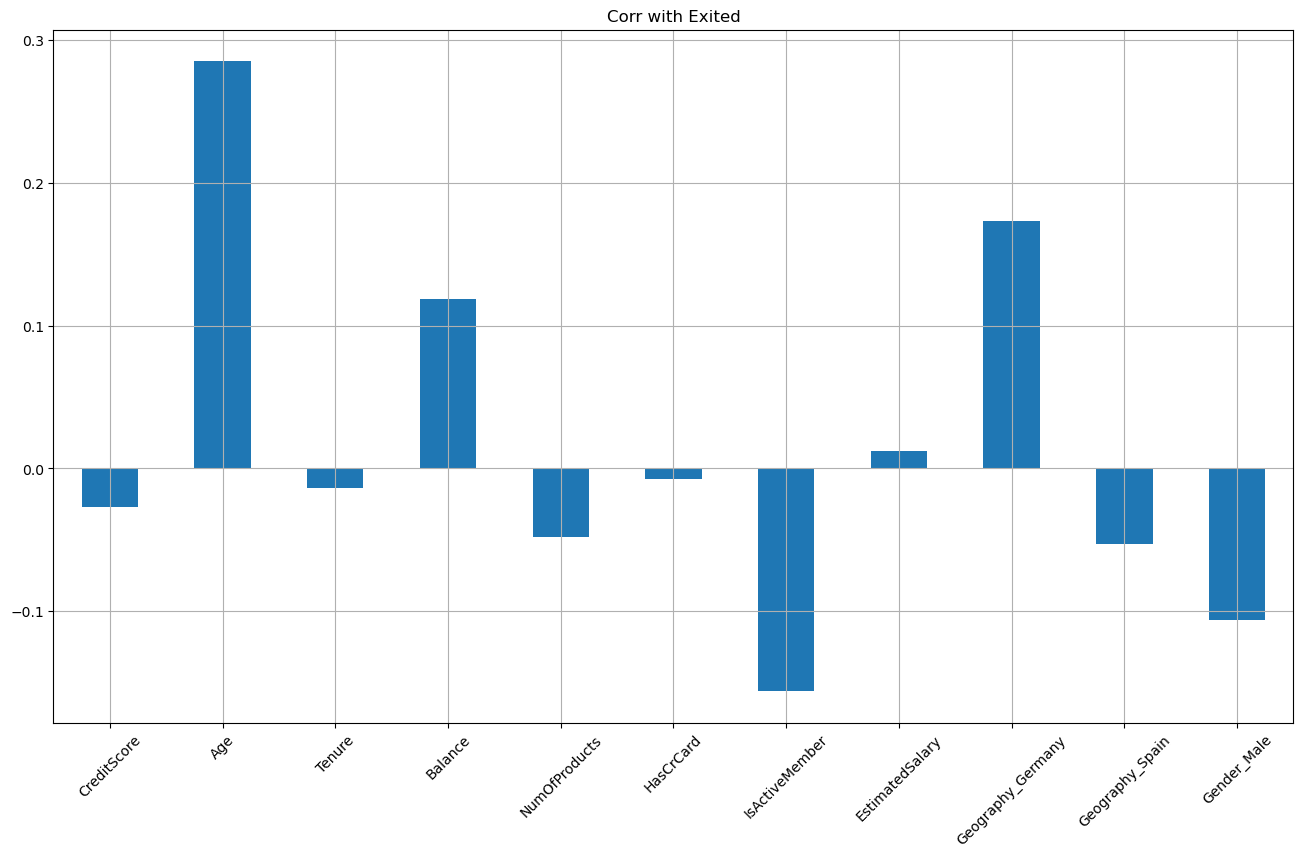

In [26]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
figsize = (16,9),title = 'Corr with Exited', rot = 45, grid = True)

In [27]:
corr = dataset.corr()

In [28]:
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

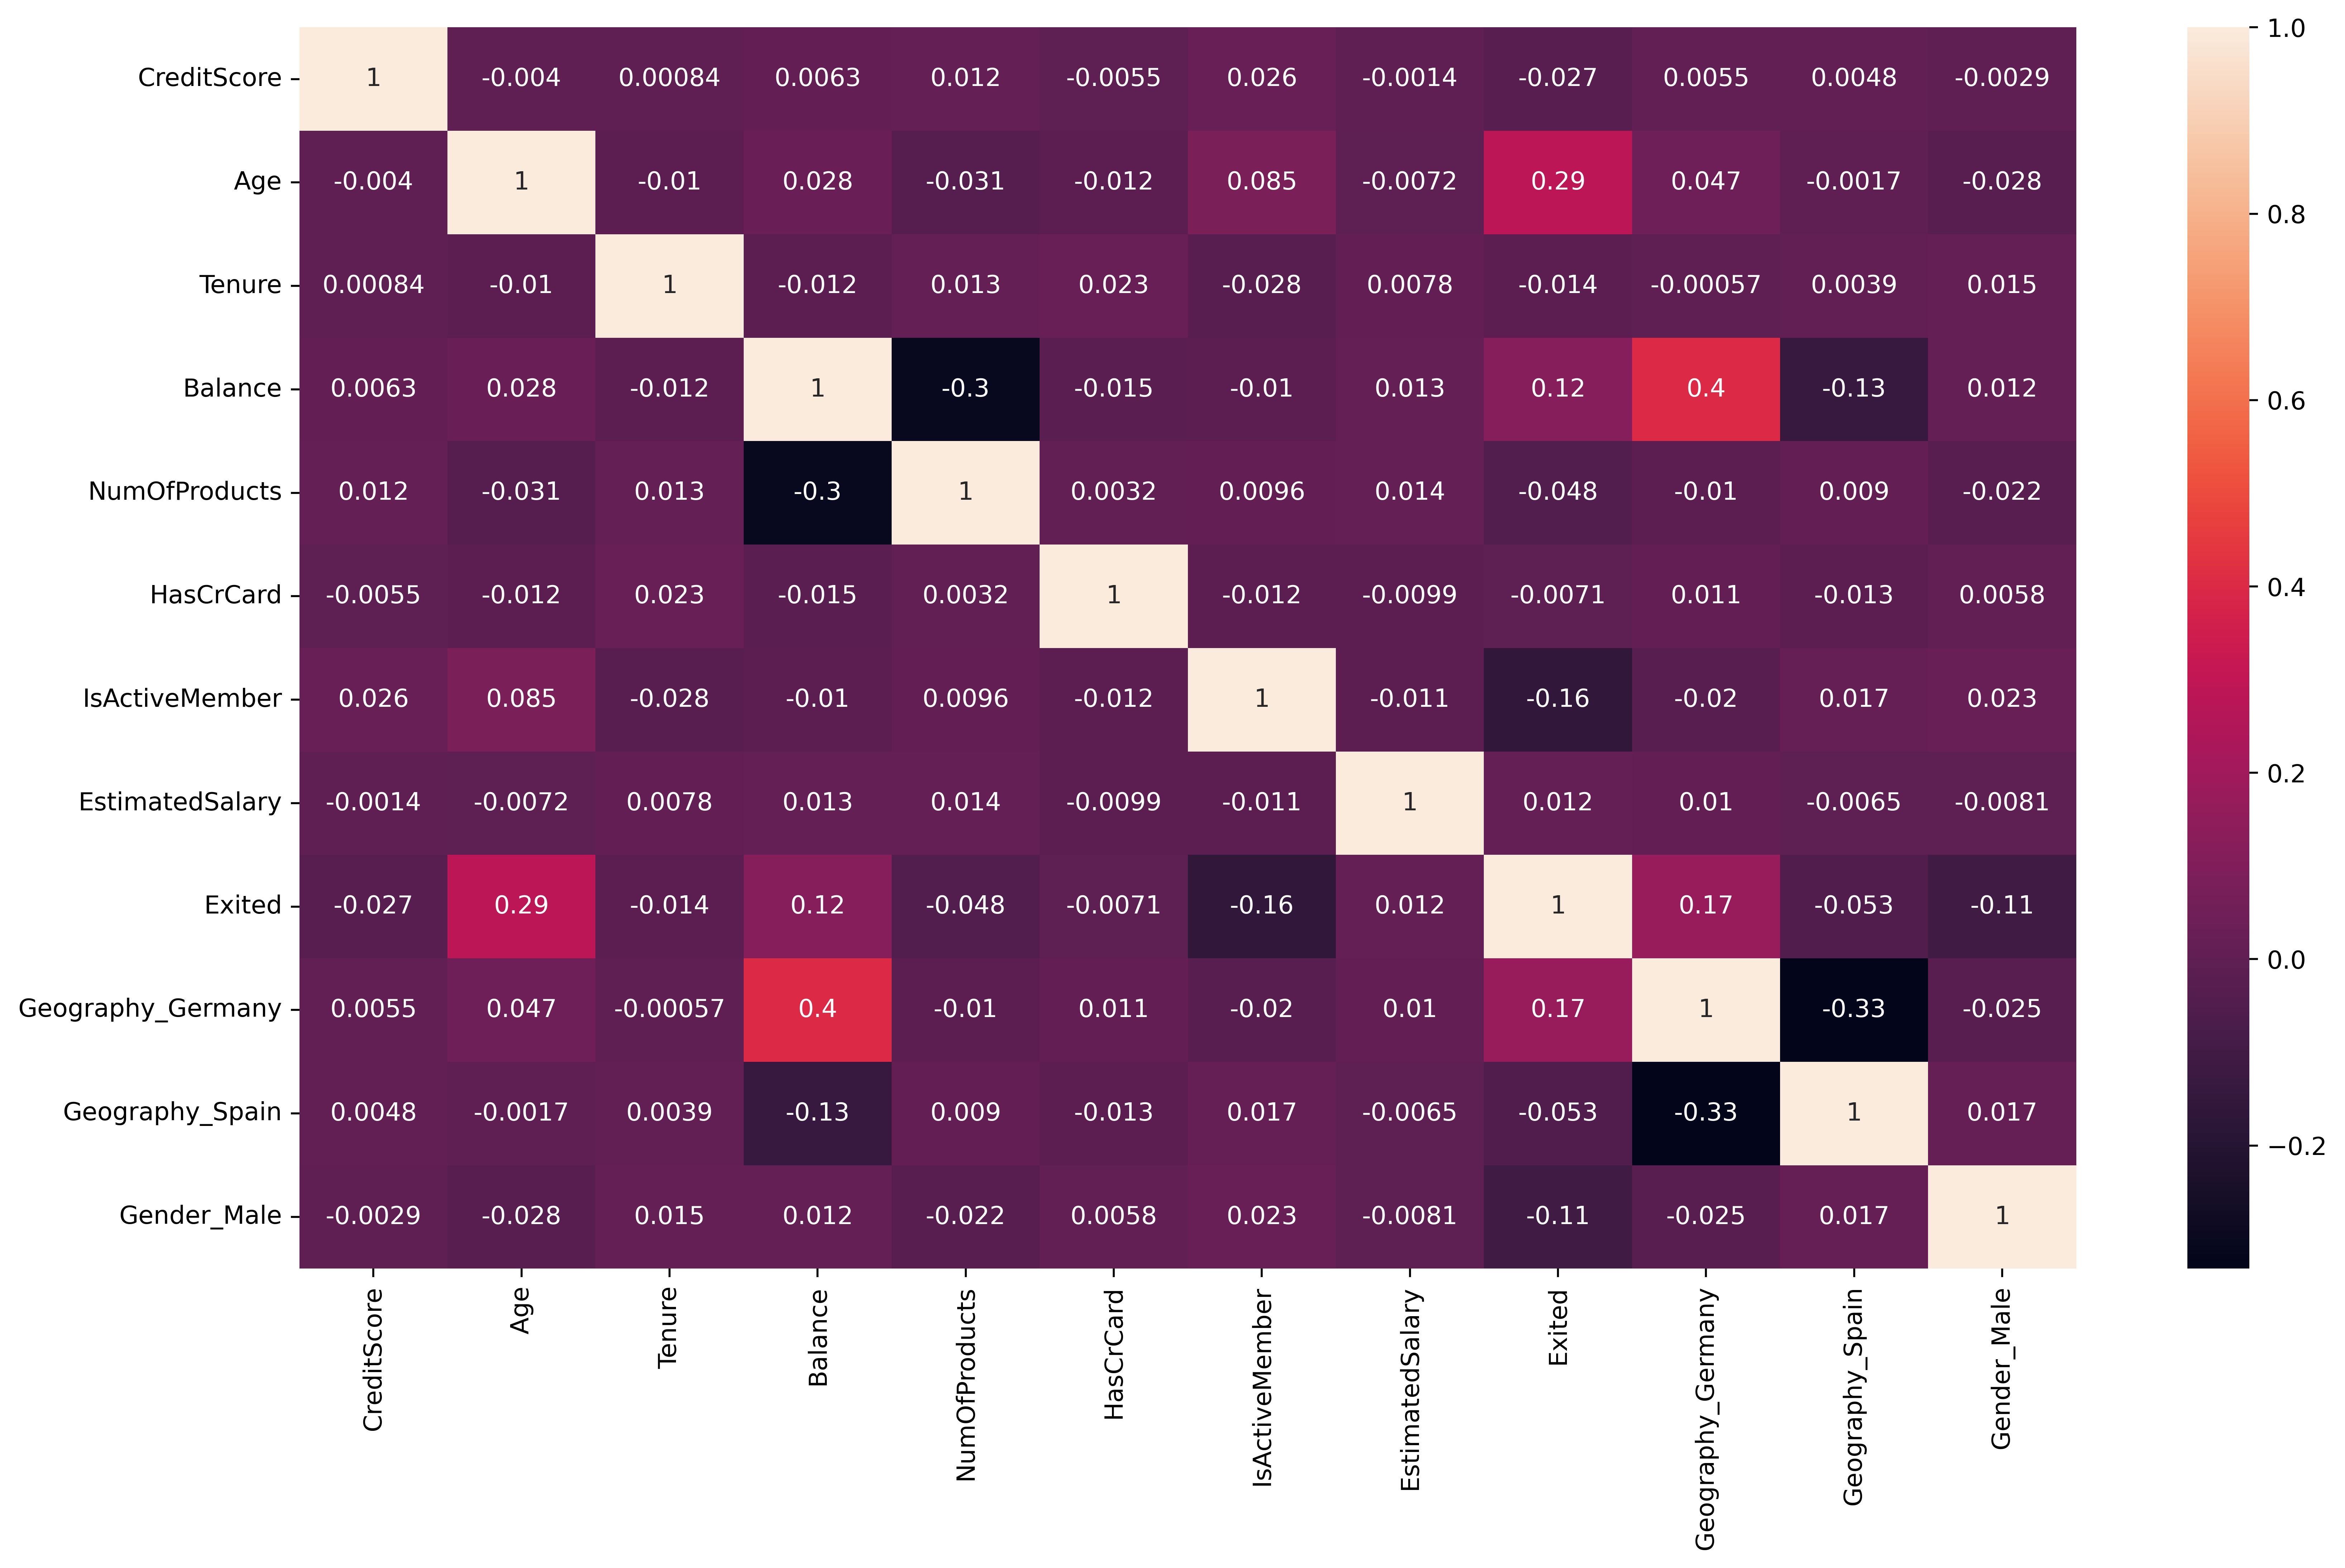

In [29]:
plt.figure(figsize=(16,9), dpi = 500)
sns.heatmap(corr,annot = True)

In [30]:
#Splitting the dataset

In [31]:
X = dataset.drop('Exited',axis = 1)

In [32]:
y = dataset['Exited']

In [33]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape

(8000, 11)

In [37]:
X_test.shape

(2000, 11)

In [38]:
y_train.shape

(8000,)

In [39]:
y_test.shape

(2000,)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression(random_state=0)

In [45]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score, recall_score

In [48]:
confusion_matrix(y_pred,y_test)

array([[1526,  309],
       [  69,   96]], dtype=int64)

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1835
           1       0.24      0.58      0.34       165

    accuracy                           0.81      2000
   macro avg       0.60      0.71      0.61      2000
weighted avg       0.90      0.81      0.84      2000



In [50]:
acc = accuracy_score(y_pred,y_test)

In [51]:
f1 = f1_score(y_pred,y_test)

In [52]:
prec = precision_score(y_pred,y_test)

In [53]:
rec = recall_score(y_pred,y_test)

In [54]:
results = pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])

In [55]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.237037,0.581818


In [56]:
#Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model,X = X_train, y = y_train, cv = 10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model1 = RandomForestClassifier(random_state=0)

In [60]:
model1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [61]:
y_pred = model1.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score, recall_score

In [63]:
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
prec = precision_score(y_pred,y_test)
rec = recall_score(y_pred,y_test)

In [64]:
model_results = pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])

In [65]:
results = results.append(model_results, ignore_index=True)

C:\Users\amita\AppData\Local\Temp\ipykernel_22712\711713695.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [66]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.867,0.613372,0.520988,0.745583


In [67]:
confusion_matrix(y_pred,y_test)

array([[1523,  194],
       [  72,  211]], dtype=int64)

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model1,X = X_train, y = y_train, cv = 10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


## XGBoost

In [69]:
from xgboost import XGBClassifier

In [70]:
model2 = XGBClassifier()

In [71]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = model2.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,precision_score, recall_score

In [74]:
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
prec = precision_score(y_pred,y_test)
rec = recall_score(y_pred,y_test)

In [75]:
model_results1 = pd.DataFrame([['XGBoost Classifier',acc,f1,prec,rec]],
                      columns=['Model','Accuracy','F1','Precision','Recall'])

In [76]:
results = results.append(model_results1, ignore_index=True)

C:\Users\amita\AppData\Local\Temp\ipykernel_22712\3416886334.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results1, ignore_index=True)


In [77]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,XGBoost Classifier,0.8525,0.594223,0.533333,0.670807


In [78]:
confusion_matrix(y_pred,y_test)

array([[1489,  189],
       [ 106,  216]], dtype=int64)

In [79]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model2,X = X_train, y = y_train, cv = 10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.12 %
Standard Deviation is 1.00 %


## Randomized Search to find best parameters for XGBoost

In [80]:
from sklearn.model_selection import RandomizedSearchCV
#in GridSearchCV all parameters are tried out but in Randomized not all are tried out

In [81]:
parameters = {
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [82]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [83]:
randomized_search = RandomizedSearchCV(estimator=model2, param_distributions=parameters, n_iter= 5, n_jobs=-1,scoring='roc_auc',cv = 5, verbose=3)

In [84]:
randomized_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [85]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
randomized_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [87]:
randomized_search.best_score_

0.8572043304167041

## Final Model(XGBoost)

In [88]:
from xgboost import XGBClassifier
classifier = XGBClassifier(min_child_weight= 1,
 max_depth= 8,
 learning_rate= 0.05,
 gamma= 0.3,
 colsample_bytree= 0.7)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy','F1' , 'Precision','Recall' ])


results = results.append(model_results, ignore_index = True)
results

C:\Users\amita\AppData\Local\Temp\ipykernel_22712\73450051.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest Classifier,0.8670,0.613372,0.520988,0.745583
2,XGBoost Classifier,0.8525,0.594223,0.533333,0.670807
3,Final XGBoost,0.8665,0.599700,0.763359,0.493827


In [90]:
confusion_matrix(y_pred,y_test)

array([[1533,  205],
       [  62,  200]], dtype=int64)

In [92]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.12 %
Standard Deviation is 0.90 %


## Predicting Single Observation

In [93]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [94]:
single_obs = [[619,42,2,0.00,1,1,1,101348.88, 0,0, 0]]

In [95]:
print(classifier.predict(sc.transform(single_obs)))

[0]


C:\Users\amita\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
